In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('10_births_hourly_data.csv')

NameError: name 'pd' is not defined

In [ ]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,baseline value,uterine_contractions
0,25.0,130.0,80.0,15.0,98.0,86.0,2,120.0,0.000
1,35.0,140.0,90.0,13.0,98.0,70.0,2,132.0,0.006
2,29.0,90.0,70.0,8.0,100.0,80.0,2,133.0,0.008
3,30.0,140.0,85.0,7.0,98.0,70.0,2,134.0,0.008
4,35.0,120.0,60.0,6.1,98.0,76.0,0,132.0,0.008


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1014 non-null   float64
 1   SystolicBP            1014 non-null   float64
 2   DiastolicBP           1014 non-null   float64
 3   BS                    1014 non-null   float64
 4   BodyTemp              1014 non-null   float64
 5   HeartRate             1014 non-null   float64
 6   RiskLevel             1015 non-null   int64  
 7   baseline value        1014 non-null   float64
 8   uterine_contractions  1014 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 71.5 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.000,39.000,70.000
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.000,120.000,160.000
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.000,90.000,100.000
BS,1014.0,8.725986,3.293532,6.0,6.9,7.500,8.000,19.000
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.000,98.000,103.000
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.000,80.000,90.000
RiskLevel,1015.0,1.004926,0.094082,0.0,1.0,1.000,1.000,2.000
baseline value,1014.0,135.492110,10.146967,114.0,128.0,135.000,144.000,159.000
uterine_contractions,1014.0,0.002940,0.002681,0.0,0.0,0.003,0.005,0.013


In [ ]:
data.rename(columns={'baseline value': 'baseline_value'}, inplace=True)

<Axes: xlabel='RiskLevel', ylabel='count'>

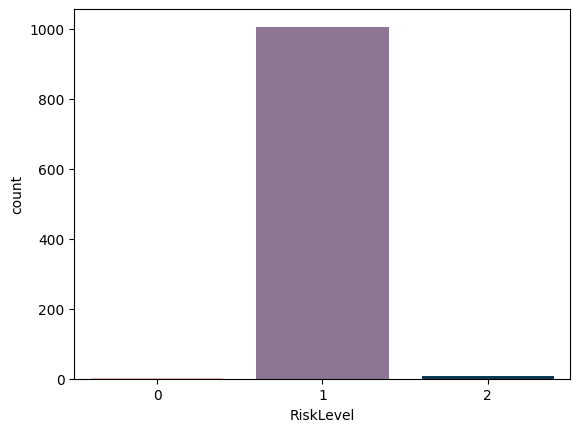

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data=data, x="RiskLevel",palette=colours)

Class Proportions:
1    335.333333
2      2.333333
0      0.666667
Name: RiskLevel, dtype: float64
The dataset is imbalanced.


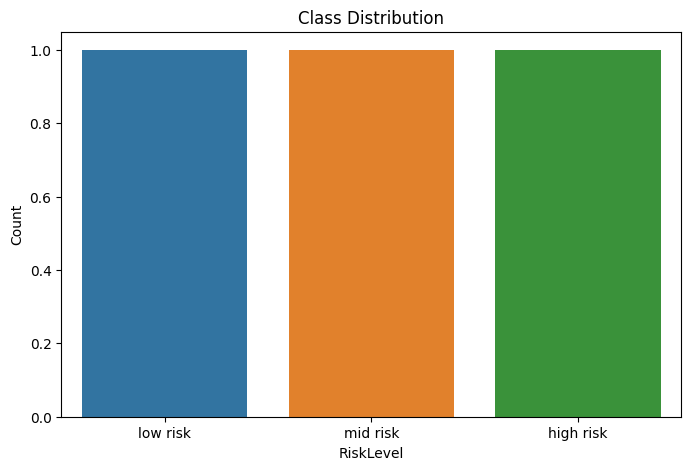

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual path to your dataset)
data = pd.read_csv('/content/drive/MyDrive/Maternal Health Risk Data Set1.csv')

# Assuming your target variable is named 'target'
target_counts = data['RiskLevel'].value_counts()

# Calculate the proportion of each class
class_proportions = target_counts / len(df)

# Check if the dataset is imbalanced
is_imbalanced = class_proportions.min() < 0.05 or class_proportions.max() > 0.95

print("Class Proportions:")
print(class_proportions)

if is_imbalanced:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='RiskLevel', data=df)
plt.title("Class Distribution")
plt.xlabel("RiskLevel")
plt.ylabel("Count")
plt.show()


<Axes: >

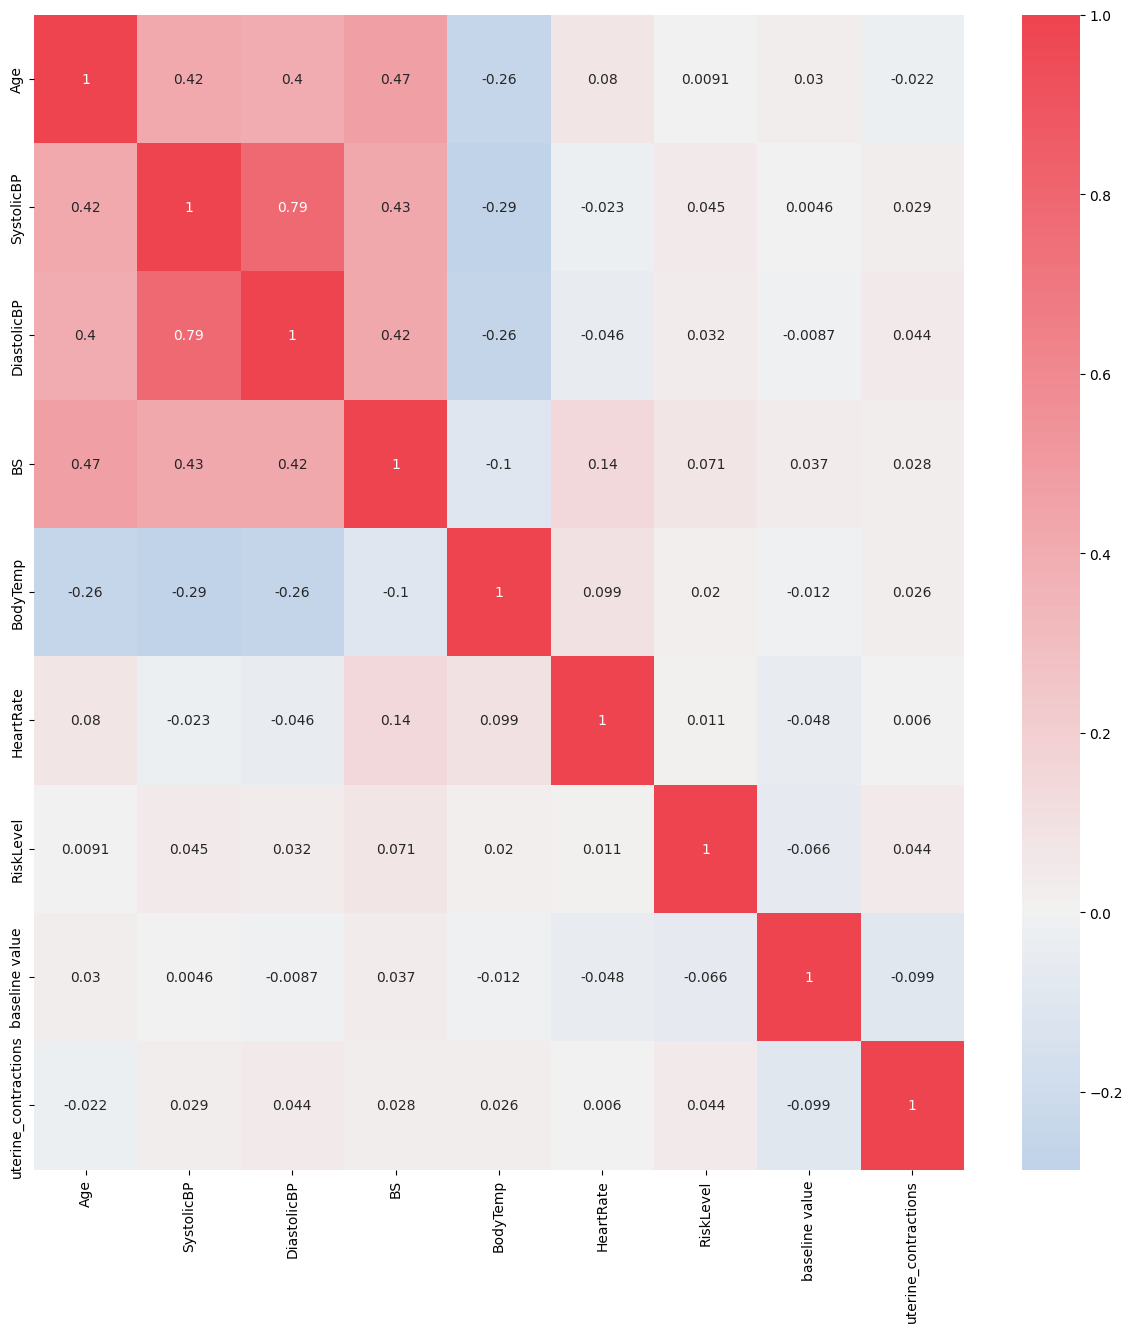

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


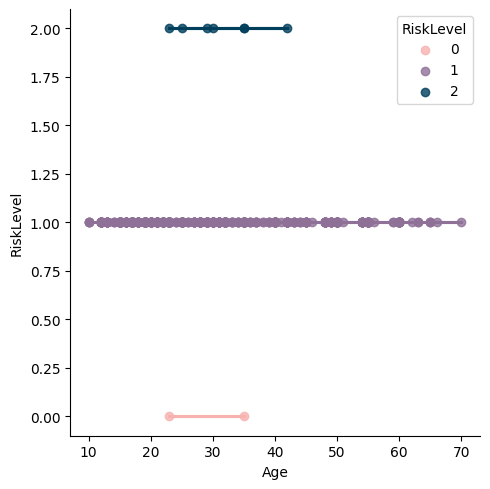

In [ ]:
sns.lmplot(data =data,x="Age",y="RiskLevel",palette=colours, hue="RiskLevel",legend_out=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


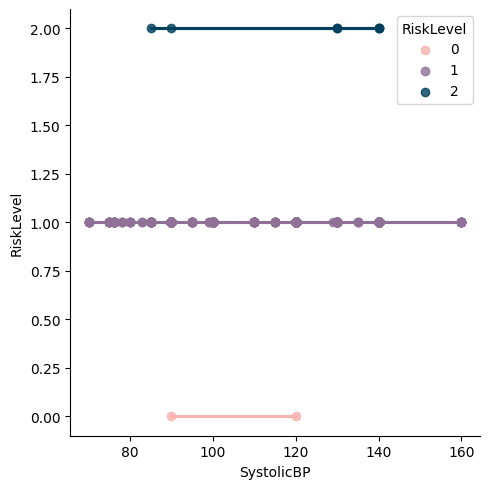

In [ ]:
sns.lmplot(data =data,x="SystolicBP",y="RiskLevel",palette=colours, hue="RiskLevel",legend_out=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


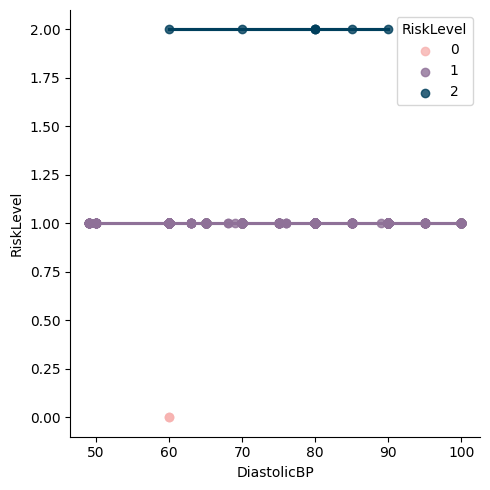

In [ ]:
sns.lmplot(data =data,x="DiastolicBP",y="RiskLevel",palette=colours, hue="RiskLevel",legend_out=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


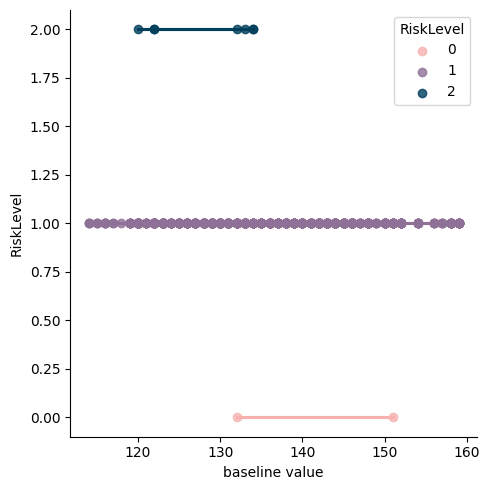

In [ ]:
sns.lmplot(data =data,x="baseline value",y="RiskLevel",palette=colours, hue="RiskLevel",legend_out=False)
plt.show()

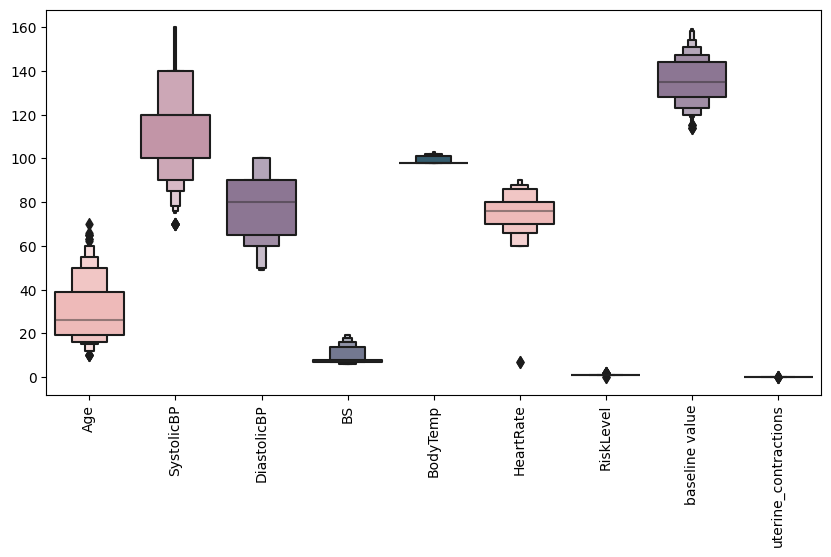

In [ ]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(10,5))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#assigning values to features as X and target as y
X=data.drop(["RiskLevel"],axis=1)
y=data["RiskLevel"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,-4.905127e-17,1.000493,-1.475511,-0.807247,-0.287487,0.677783,2.979580
SystolicBP,1014.0,-7.708057e-17,1.000493,-2.348389,-0.717496,0.369765,0.369765,2.544289
DiastolicBP,1014.0,4.694908e-16,1.000493,-1.978576,-0.825751,0.255023,0.975539,1.696054
BS,1014.0,-2.137234e-16,1.000493,-0.828087,-0.554689,-0.372424,-0.220537,3.120991
BodyTemp,1014.0,2.151249e-15,1.000493,-0.485215,-0.485215,-0.485215,-0.485215,3.162534
HeartRate,1014.0,1.366428e-16,1.000493,-8.324572,-0.532088,0.210054,0.704815,1.941717
baseline value,1014.0,9.494925e-16,1.000493,-2.119127,-0.738724,-0.048522,0.838880,2.317884
uterine_contractions,1014.0,1.401465e-17,1.000493,-1.097078,-1.097078,0.022449,0.768801,3.754209


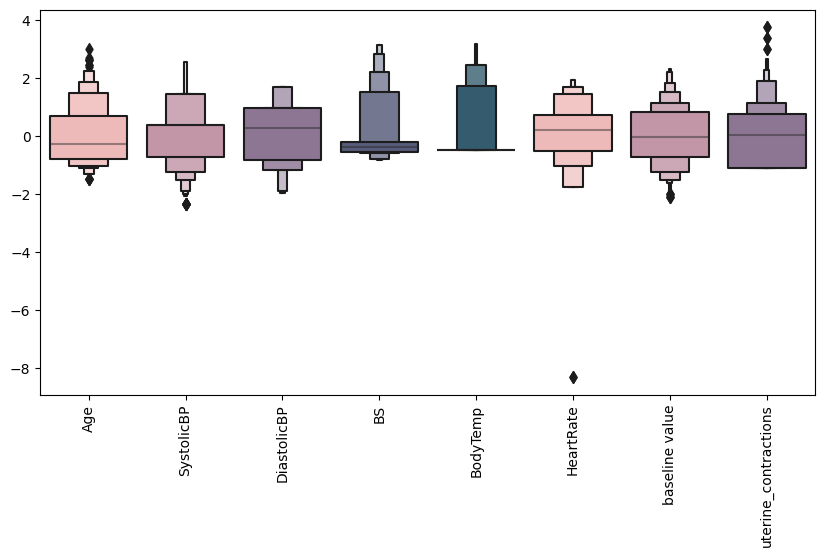

In [ ]:
#looking at the scaled features
plt.figure(figsize=(10,5))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [113]:
data.isnull().sum()

Age                     1
SystolicBP              1
DiastolicBP             1
BS                      1
BodyTemp                1
HeartRate               1
RiskLevel               0
baseline value          1
uterine_contractions    1
dtype: int64

In [114]:
data.dropna(axis=0)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,baseline value,uterine_contractions
0,25.0,130.0,80.0,15.0,98.0,86.0,2,120.0,0.000
1,35.0,140.0,90.0,13.0,98.0,70.0,2,132.0,0.006
2,29.0,90.0,70.0,8.0,100.0,80.0,2,133.0,0.008
3,30.0,140.0,85.0,7.0,98.0,70.0,2,134.0,0.008
4,35.0,120.0,60.0,6.1,98.0,76.0,0,132.0,0.008
...,...,...,...,...,...,...,...,...,...
1009,22.0,120.0,60.0,15.0,98.0,80.0,1,122.0,0.000
1010,55.0,120.0,90.0,18.0,98.0,60.0,1,139.0,0.005
1011,35.0,85.0,60.0,19.0,98.0,86.0,1,139.0,0.005
1012,43.0,120.0,90.0,18.0,98.0,70.0,1,139.0,0.003


In [116]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [117]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

ValueError: ignored

In [118]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [121]:
def calculate_metrics(TP, FP, FN):
    epsilon = 1e-9  # A small positive value to avoid division by zero

    precision = TP / (TP + FP + epsilon)
    recall = TP / (TP + FN + epsilon)
    f1_score = 2 * (precision * recall) / (precision + recall + epsilon)

    return precision, recall, f1_score


In [122]:
# Create the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9836065573770492
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99       300
           2       0.00      0.00      0.00         4

    accuracy                           0.98       305
   macro avg       0.33      0.33      0.33       305
weighted avg       0.97      0.98      0.98       305

Confusion Matrix:
[[  0   1   0]
 [  0 300   0]
 [  0   4   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
